<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [4]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [5]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-06-13 17:49:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.4MB/s    in 2.7s    

2025-06-13 17:49:52 (56.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


/tmp/ipykernel_1772/3899055848.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeNumeric'] = df['Age'].replace(age_replacements)
/tmp/ipykernel_1772/3899055848.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SOPartFreqNumeric'] = df['SOPartFreq'].replace(freq_map)


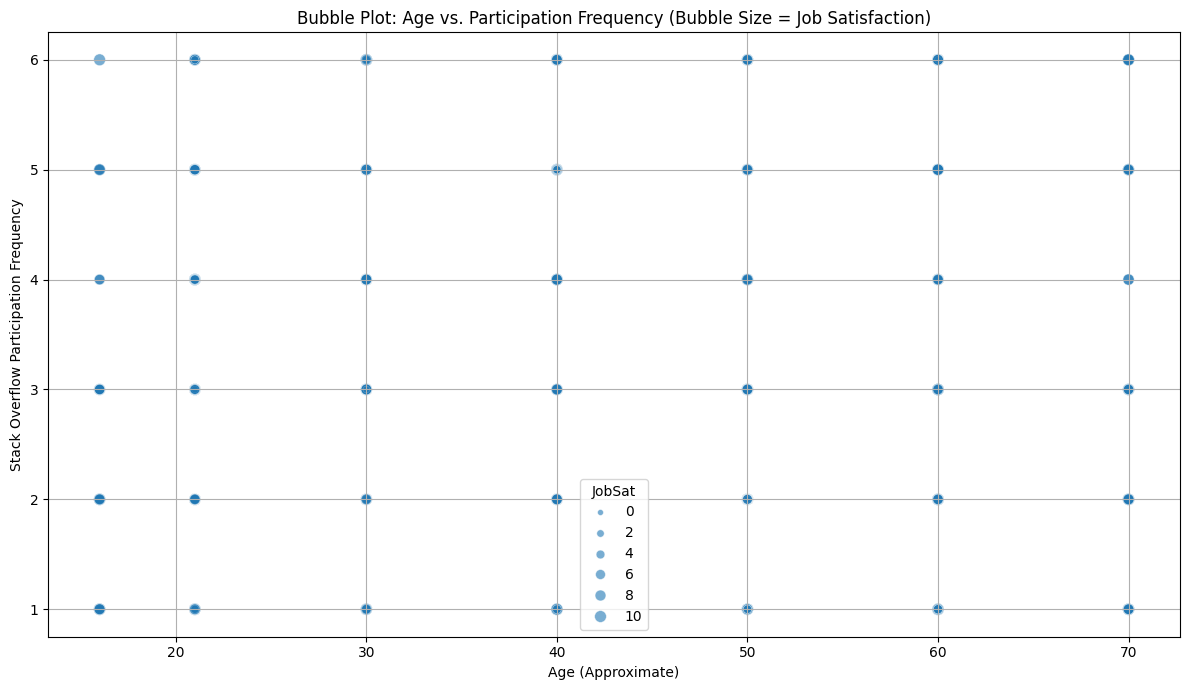

In [14]:
##Write your code here

# Convert Age to numeric midpoint
age_replacements = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].replace(age_replacements)

# Convert SOPartFreq to ordinal scale based on actual responses
freq_map = {
    "Multiple times per day": 6,
    "Daily or almost daily": 5,
    "A few times per week": 4,
    "A few times per month or weekly": 3,
    "Less than once per month or monthly": 2,
    "I have never participated in Q&A on Stack Overflow": 1
}
df['SOPartFreqNumeric'] = df['SOPartFreq'].replace(freq_map)

# Filter for clean data
df_filtered = df[['AgeNumeric', 'SOPartFreqNumeric', 'JobSat']].dropna()

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='AgeNumeric',
    y='SOPartFreqNumeric',
    size='JobSat',
    #sizes=(50, 500),
    alpha=0.6,
    legend='brief')
plt.title('Bubble Plot: Age vs. Participation Frequency (Bubble Size = Job Satisfaction)')
plt.xlabel('Age (Approximate)')
plt.ylabel('Stack Overflow Participation Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


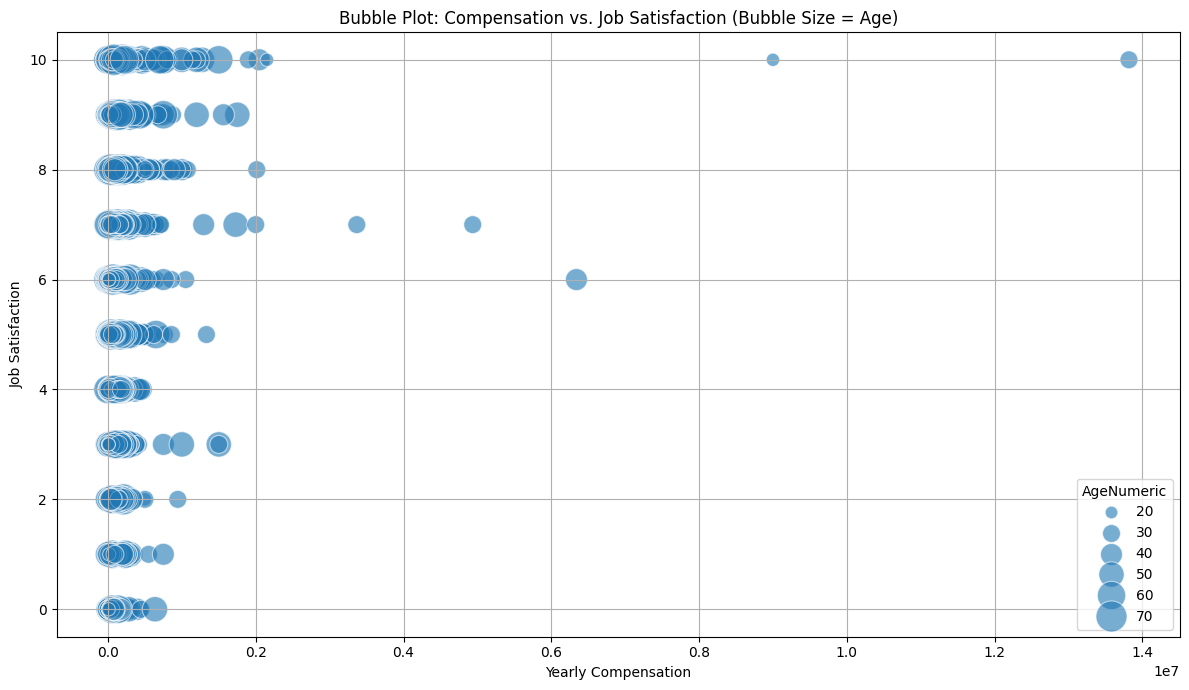

In [16]:
##Write your code here

# 4. Drop rows with missing values
df_filtered = df[['ConvertedCompYearly', 'JobSat', 'AgeNumeric']].dropna()

# 5. Plot the bubble plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSat',
    size='AgeNumeric',
    sizes=(50, 500),
    alpha=0.6,
    legend='brief')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



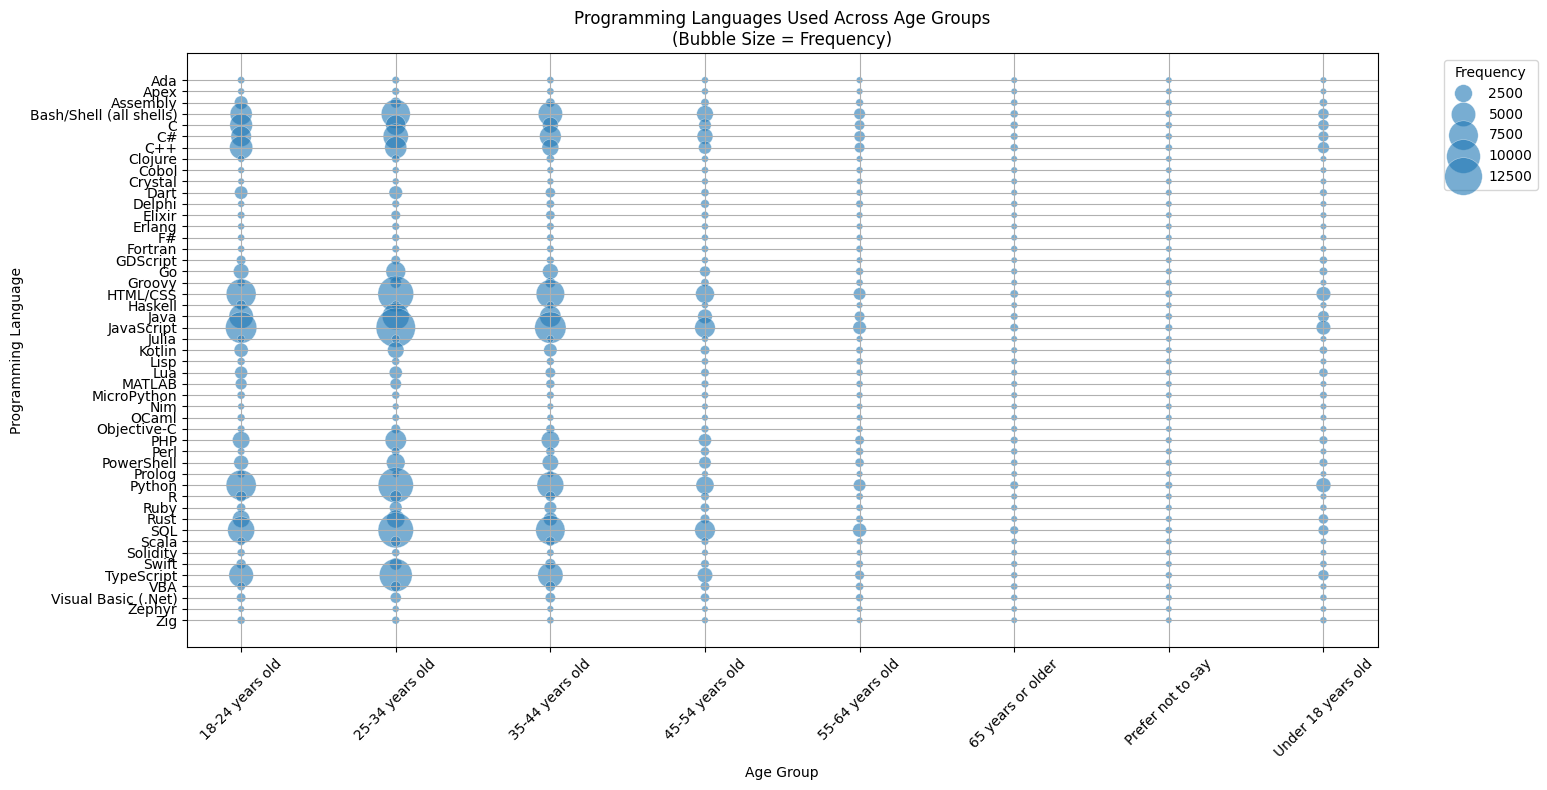

In [18]:
##Write your code here

# Drop rows with missing Age or LanguageHaveWorkedWith
df_filtered = df[['Age', 'LanguageHaveWorkedWith']].dropna()

# Split multiple languages into separate rows
df_exploded = df_filtered.assign(
    Language=df_filtered['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Group by Age and Language, and count occurrences
lang_counts = df_exploded.groupby(['Age', 'Language']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 8))
bubble = sns.scatterplot(
    data=lang_counts,
    x='Age',
    y='Language',
    size='Count',
    sizes=(20, 800),
    alpha=0.6,
    legend='brief')
plt.title('Programming Languages Used Across Age Groups\n(Bubble Size = Frequency)')
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


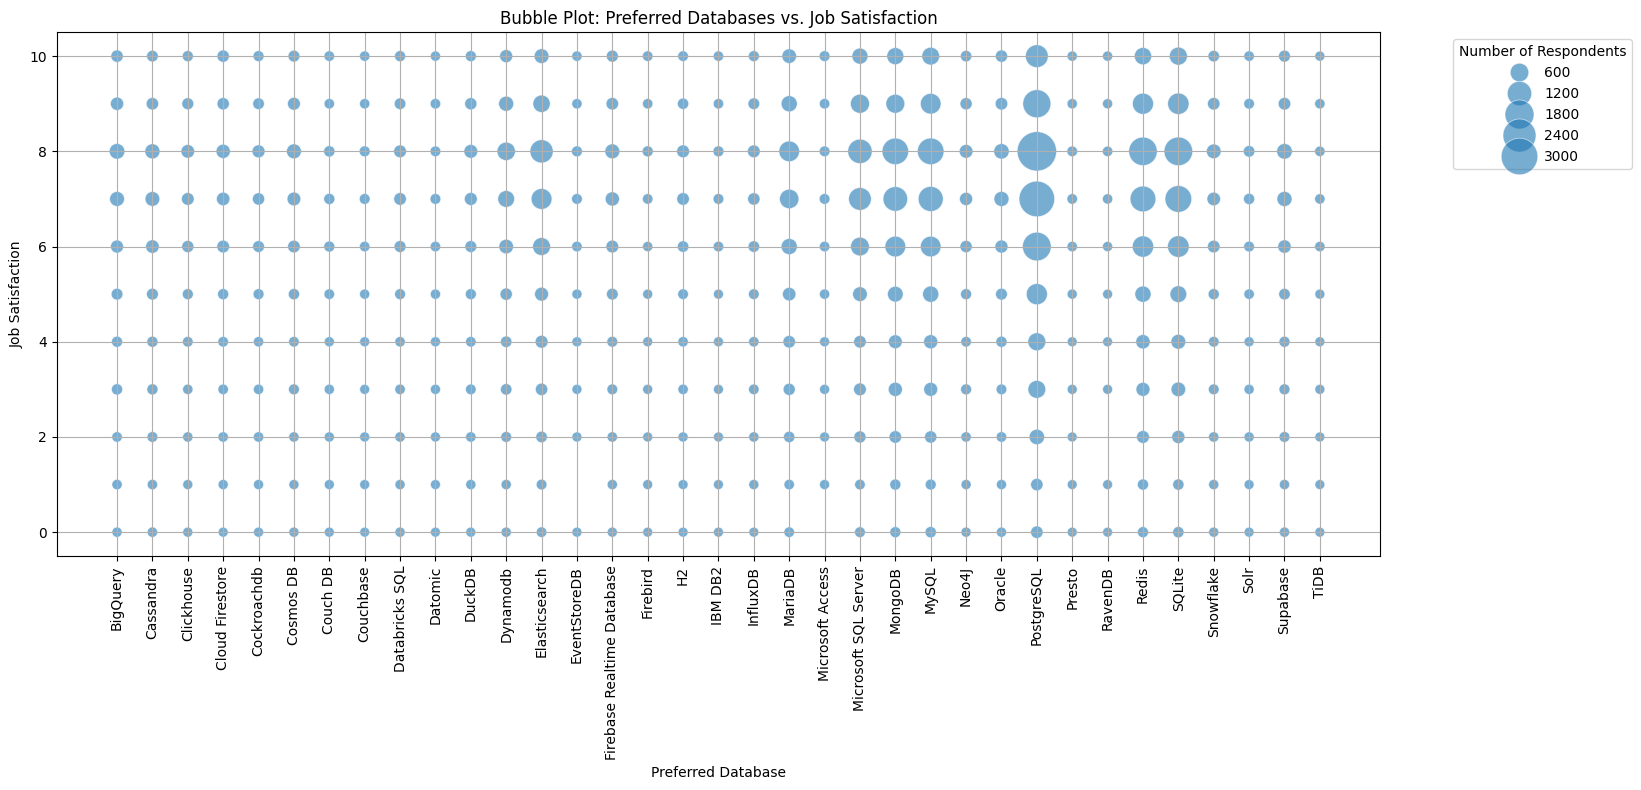

In [23]:
##Write your code here
# Drop rows with missing values
df_filtered = df[['DatabaseWantToWorkWith', 'JobSat']].dropna()

# Explode semicolon-separated values into individual rows
df_exploded = df_filtered.assign(
    Database=df_filtered['DatabaseWantToWorkWith'].str.split(';')
).explode('Database')

# Group by database and satisfaction level
grouped = df_exploded.groupby(['Database', 'JobSat']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=grouped,
    x='Database',
    y='JobSat',
    size='Count',
    sizes=(50, 800),
    alpha=0.6,
    legend='brief')
plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction')
plt.xlabel('Preferred Database')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Number of Respondents', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


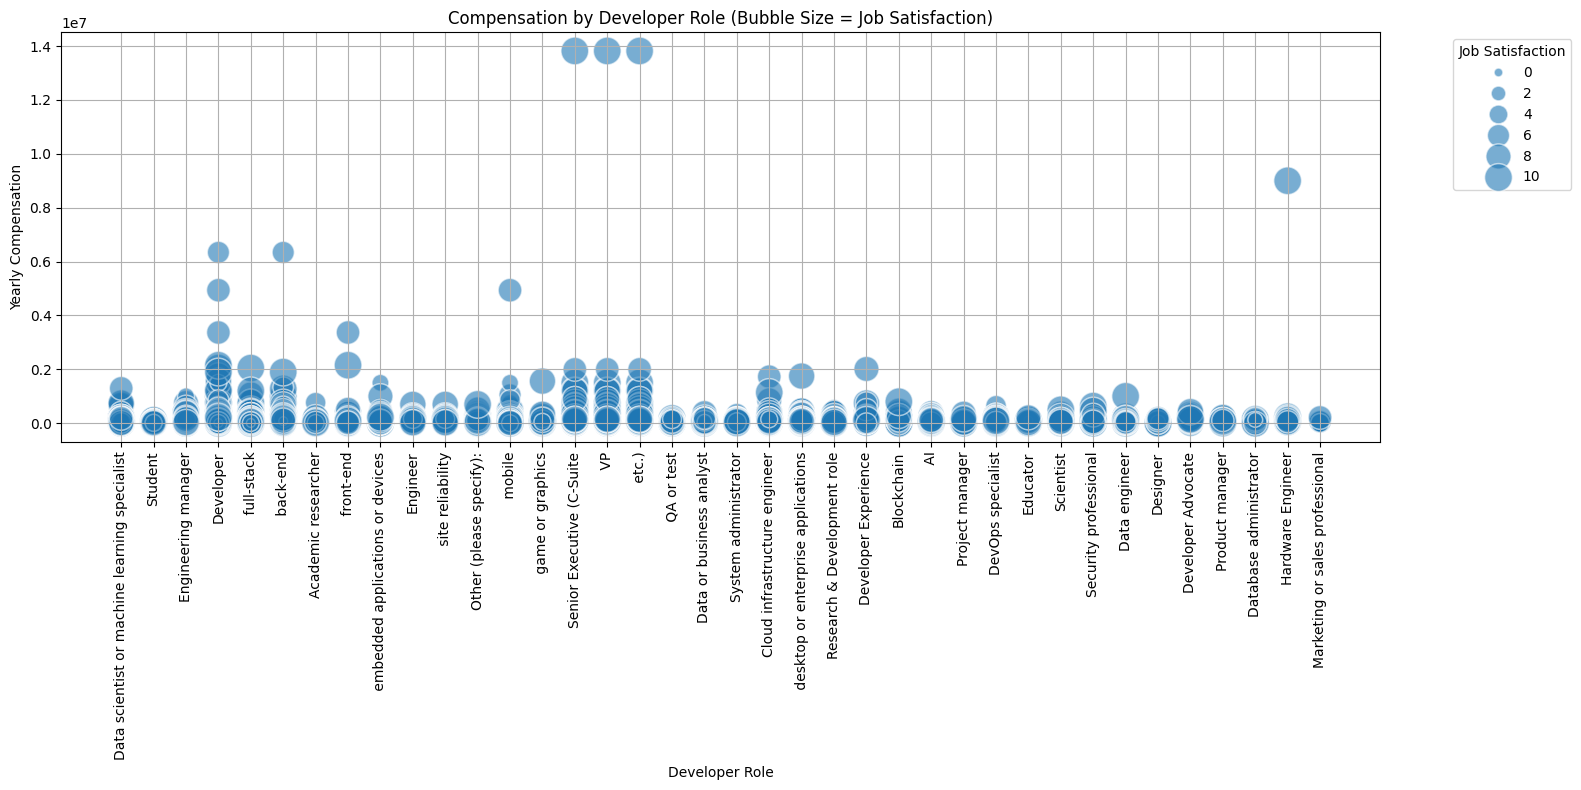

In [31]:
##Write your code here
# Drop rows with missing required columns
df_filtered = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()

# Explode multi-role entries into separate rows
df_exploded = df_filtered.assign(
    DevType=df_filtered['DevType'].str.split(',')
).explode('DevType')

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_exploded,
    x='DevType',
    y='ConvertedCompYearly',
    size='JobSat',
    sizes=(40, 400),
    alpha=0.6,
    legend='brief')
plt.title('Compensation by Developer Role (Bubble Size = Job Satisfaction)')
plt.xlabel('Developer Role')
plt.ylabel('Yearly Compensation')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


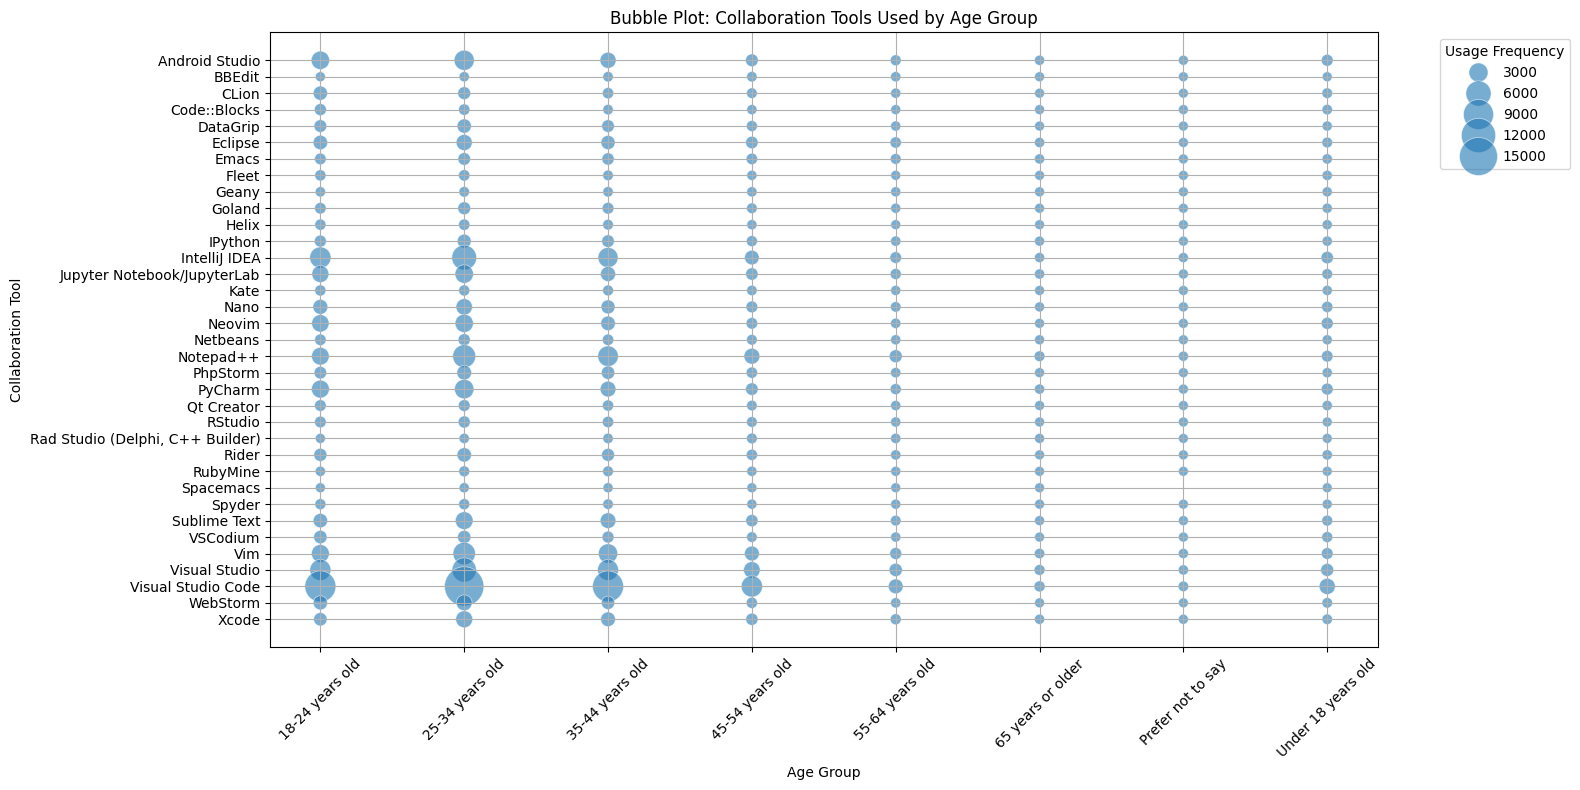

In [34]:
##Write your code here

# Drop rows with missing Age or Collaboration Tools
df_filtered = df[['Age', 'NEWCollabToolsHaveWorkedWith']].dropna()

# Explode semicolon-separated tool entries into individual rows
df_exploded = df_filtered.assign(
    Tool=df_filtered['NEWCollabToolsHaveWorkedWith'].str.split(';')
).explode('Tool')

# Group by Age and Tool and count frequency
grouped = df_exploded.groupby(['Age', 'Tool']).size().reset_index(name='Count')

# Plot bubble plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=grouped,
    x='Age',
    y='Tool',
    size='Count',
    sizes=(50, 800),
    alpha=0.6,
    legend='brief')
plt.title('Bubble Plot: Collaboration Tools Used by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Collaboration Tool')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Usage Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



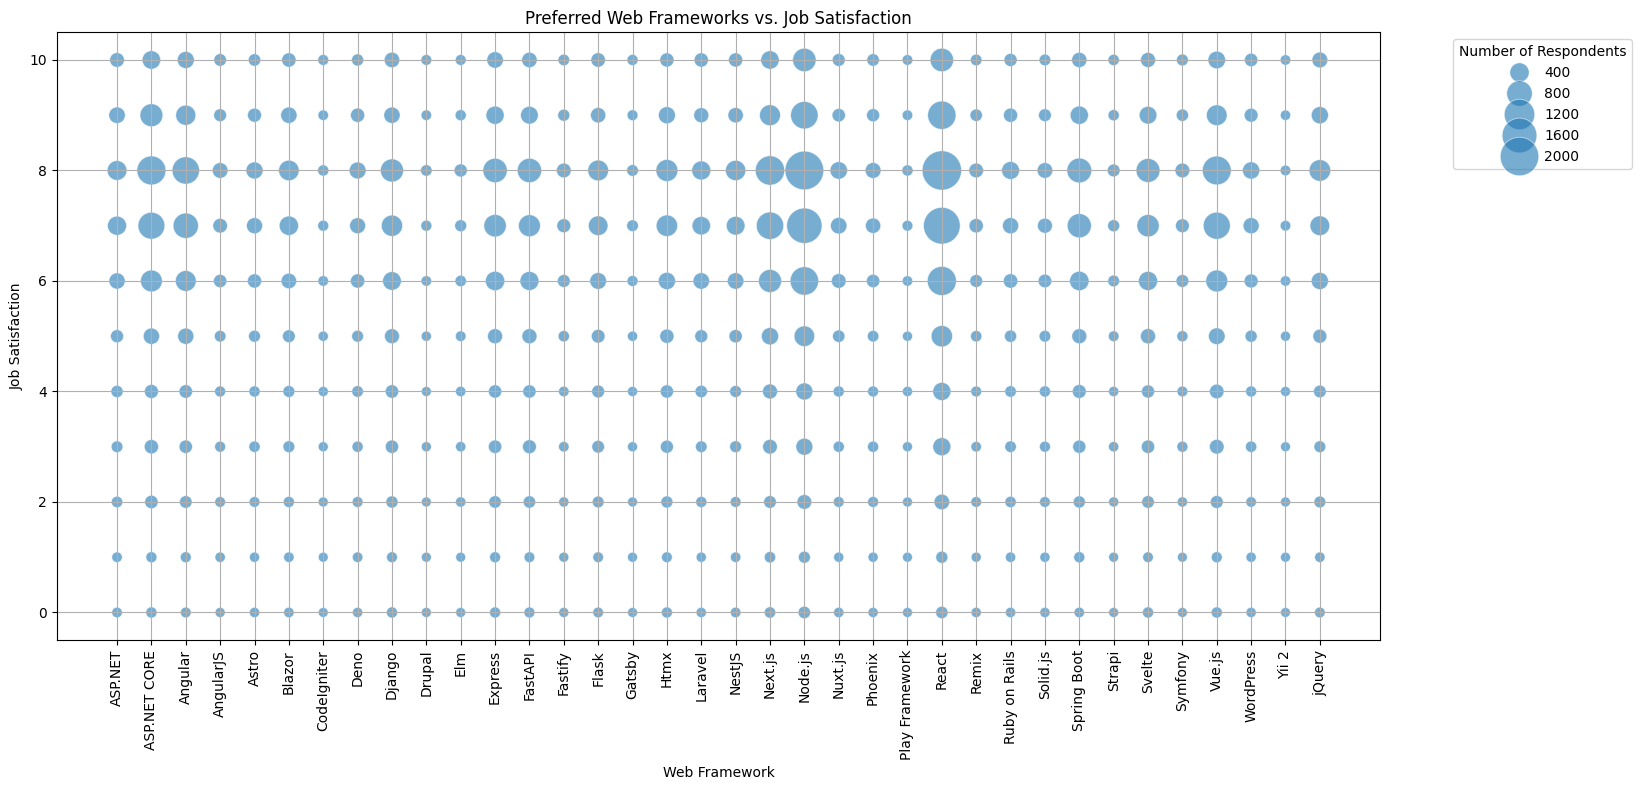

WebFramework  JobSat  Count
0        ASP.NET     0.0     20
1        ASP.NET     1.0     19
2        ASP.NET     2.0     48
3        ASP.NET     3.0     57
4        ASP.NET     4.0     73
..           ...     ...    ...
391       jQuery     6.0    284
392       jQuery     7.0    421
393       jQuery     8.0    529
394       jQuery     9.0    288
395       jQuery    10.0    220

[396 rows x 3 columns]

In [36]:
##Write your code here

# Keep only relevant columns and drop missing values
df_filtered = df[['WebframeWantToWorkWith', 'JobSat']].dropna()

# Split semicolon-separated values into separate rows
df_exploded = df_filtered.assign(
    WebFramework=df_filtered['WebframeWantToWorkWith'].str.split(';')
).explode('WebFramework')

# Group by framework and satisfaction level
grouped = df_exploded.groupby(['WebFramework', 'JobSat']).size().reset_index(name='Count')

# Plot bubble chart
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=grouped,
    x='WebFramework',
    y='JobSat',
    size='Count',
    sizes=(50, 800),
    alpha=0.6,
    legend='brief')
plt.title('Preferred Web Frameworks vs. Job Satisfaction')
plt.xlabel('Web Framework')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Number of Respondents', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
grouped

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



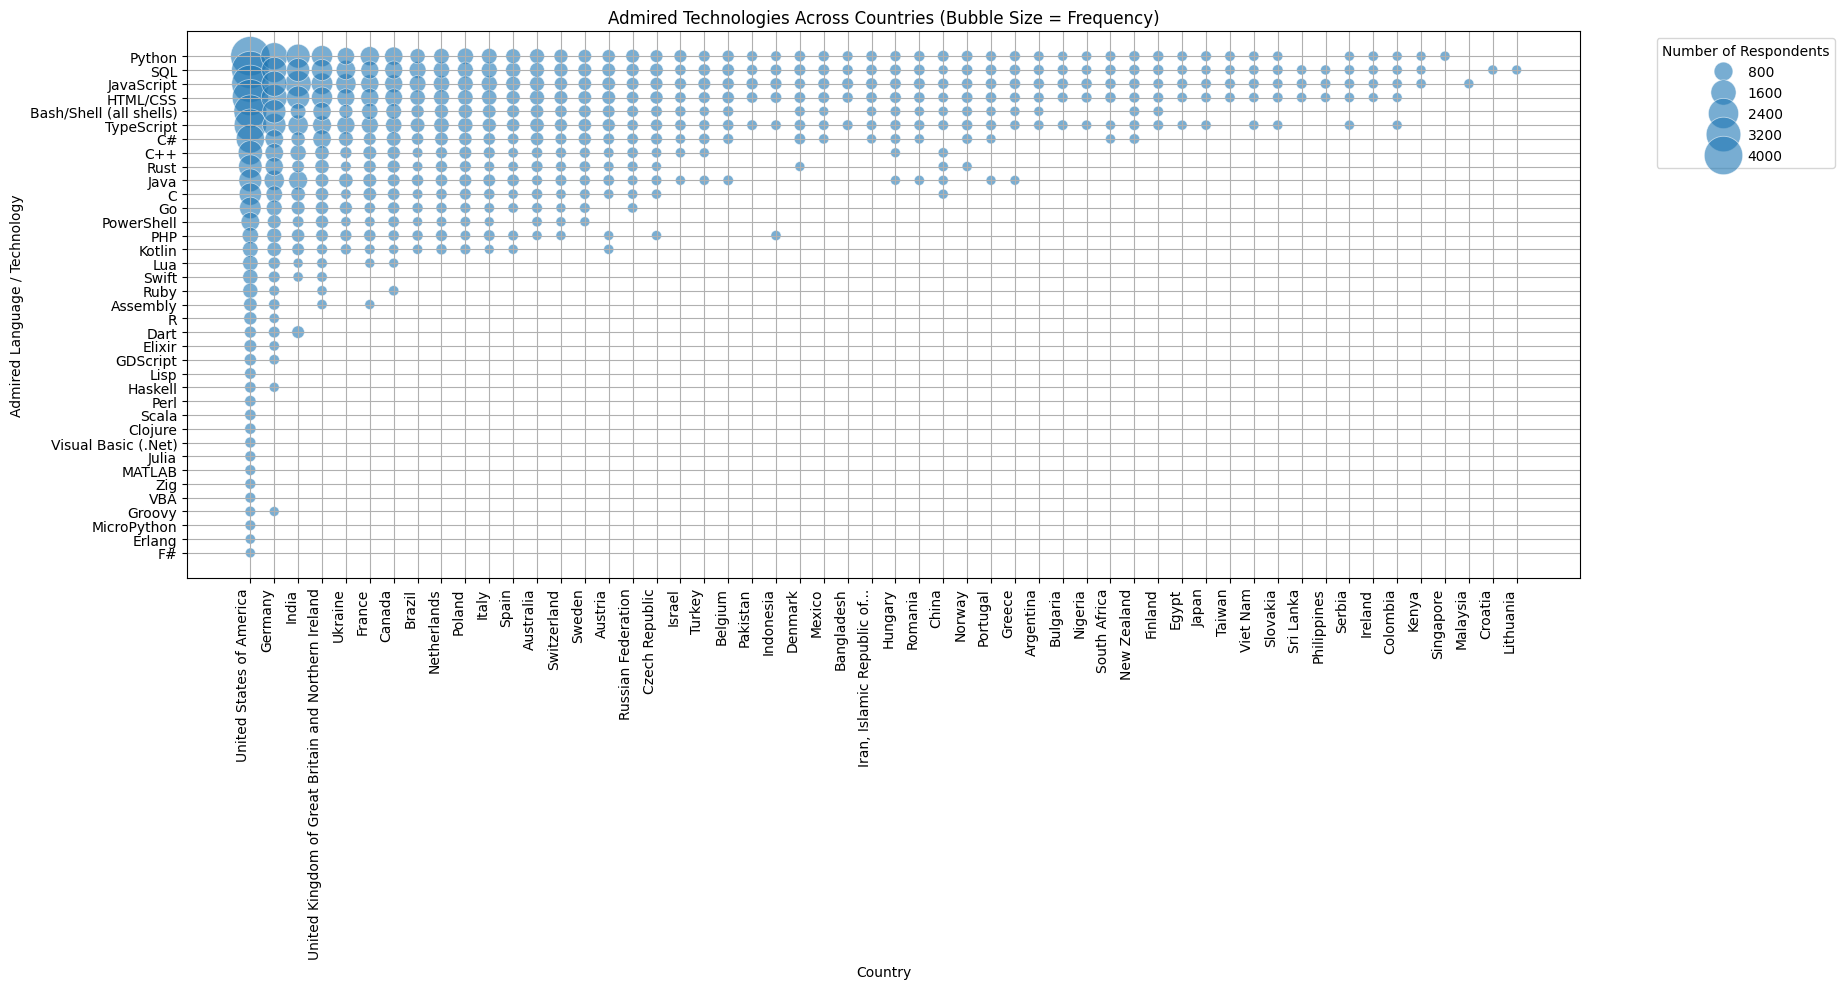

Country                 Language  Count
4403  United States of America                   Python   4190
4407  United States of America                      SQL   3765
4389  United States of America               JavaScript   3728
4386  United States of America                 HTML/CSS   3513
4370  United States of America  Bash/Shell (all shells)   2872
...                        ...                      ...    ...
1552                    Greece                     Java     65
1674                   Hungary                      C++     65
2019                     Italy                   Kotlin     65
2182                     Kenya                      SQL     65
2343                 Lithuania                      SQL     65

[500 rows x 3 columns]

In [42]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only relevant columns and drop missing values
df_filtered = df[['Country', 'LanguageAdmired']].dropna()

# Explode semicolon-separated values into individual rows
df_exploded = df_filtered.assign(
    Language=df_filtered['LanguageAdmired'].str.split(';')
).explode('Language')

# Group by Country and Admired Language, and count frequency
grouped = df_exploded.groupby(['Country', 'Language']).size().reset_index(name='Count')
# lets take the top 500 rows based on the "Count" column (i.e. most admired tech-country pairs)
grouped = grouped.nlargest(500, 'Count')
# Plot bubble plot
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=grouped,
    x='Country',
    y='Language',
    size='Count',
    sizes=(50, 800),
    alpha=0.6,
    legend='brief')
plt.title('Admired Technologies Across Countries (Bubble Size = Frequency)')
plt.xlabel('Country')
plt.ylabel('Admired Language / Technology')
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Number of Respondents', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
grouped

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
